___
# Ciência dos Dados - PROJETO 1

## Vitor Satyro Vitturi
___

___
## Introdução
A partir da analise é possivel observar como a população utiliza a internet, via celular ou via microcomputador. Dentre estes, quais seria mais efetivo para marketing de uma empresa.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\VITOR\Dropbox\Insper\2017.2\Ciencia de Dados\Projeto1\CienciaDados


In [3]:
#Configurar as colunas que usarei

dados_2015 = pd.read_csv('DOM2015.csv',sep=',')

dados_2015 = pd.DataFrame(dados_2015)

dados15 = dados_2015.loc[:,['UF','V4621','V02322','V02323','V02324','V02424',]]


#dados15.head(2)

In [4]:
#Tirar NaN
dados15 = dados15.loc[(dados15.V4621 >= 0) & (dados15.V4621 != 999999999999)]
dados15 = dados15.loc[dados15.UF == 35]
dados15 = dados15[pd.notnull(dados15.V4621) &\
                  pd.notnull(dados15.V02322) &\
                  pd.notnull(dados15.V02323) &\
                  pd.notnull(dados15.V02324) &\
                  pd.notnull(dados15.V02424)]


In [5]:
dados15.head(3)

,UF,V4621,V02322,V02323,V02324,V02424
93132,35,4250.0,2.0,2.0,2.0,2.0
93133,35,1262.0,2.0,2.0,2.0,2.0
93135,35,3000.0,2.0,2.0,2.0,2.0


In [6]:
dados15.UF = dados15.UF.astype('category')
dados15.V4621 = dados15.V4621.astype('int')
dados15.V02322 = dados15.V02322.astype('category')
dados15.V02323 = dados15.V02323.astype('category')
dados15.V02324 = dados15.V02324.astype('category')
dados15.V02424 = dados15.V02424.astype('category')

dados15.UF.cat.categories = {'São Paulo'}
dados15.V02322.cat.categories = {'Sim'}
dados15.V02323.cat.categories = {'Sim','Não'}
dados15.V02324.cat.categories = {'Sim','Não'}
dados15.V02424.cat.categories = {'Sim','Não'}
dados15.head(10)
#dados15.V02424.cat.categories

,UF,V4621,V02322,V02323,V02324,V02424
93132,São Paulo,4250,Sim,Sim,Sim,Sim
93133,São Paulo,1262,Sim,Sim,Sim,Sim
93135,São Paulo,3000,Sim,Sim,Sim,Sim
93140,São Paulo,1550,Sim,Sim,Sim,Não
93143,São Paulo,2300,Sim,Sim,Sim,Sim
93147,São Paulo,788,Sim,Sim,Sim,Sim
93148,São Paulo,697,Sim,Sim,Sim,Sim
93149,São Paulo,900,Sim,Sim,Sim,Sim
93150,São Paulo,1744,Sim,Sim,Não,Não
93156,São Paulo,1333,Sim,Não,Sim,Sim


In [7]:
dados15 = dados15.rename(columns = {"V4621":"Renda Salarial(R$)","V02322":"Acesso a internet em Domicílio", "V02323":"Acesso a internet em Microcomputador", "V02324":"Acesso a internet em Celular","V02424":"Acesso a internet em 3G 4G"})
renda_15 = dados15["Renda Salarial(R$)"]

In [8]:
#Variaveis escolhidas de acordo com o salário minimo e a distribuição normal de renda

alta = 3000
media = 1500
baixa = 500

dados15.loc[dados15["Renda Salarial(R$)"] <= baixa, "Classe"] = "baixa"
dados15.loc[(dados15["Renda Salarial(R$)"] > baixa) & (dados15["Renda Salarial(R$)"] <= media), "Classe"] = "média_baixa"
dados15.loc[(dados15["Renda Salarial(R$)"] > media) & (dados15["Renda Salarial(R$)"] <= alta), "Classe"] = "média"
dados15.loc[dados15["Renda Salarial(R$)"] > alta, "Classe"] = "alta"

dados15["Classe"] = dados15["Classe"].astype('category')

In [9]:
import math as m
raiz = m.sqrt(len(renda_15))
raiz = int(raiz)

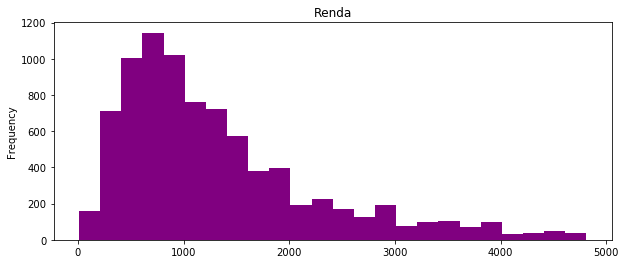

In [13]:
#Prova de uma distribuição do tipo normal na renda devido ao salario minimo

ganham_menos = renda_15[renda_15 < 50000]
ganham_menos.plot(kind='hist', bins = range(10,5000,200), figsize=(10,4), color=("Purple"))
plt.title('Renda')

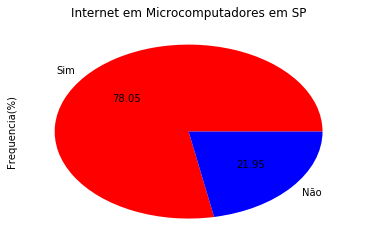

In [11]:
micro = dados15["Acesso a internet em Microcomputador"].value_counts(True)*100
micro.plot(kind='pie', autopct="%.2f", colors=('red','blue'))
plt.title("Internet em Microcomputadores em SP")
plt.ylabel('Frequencia(%)')


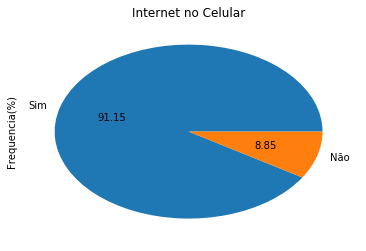

In [14]:
celular = dados15["Acesso a internet em Celular"].value_counts(True)*100
celular.plot(kind='pie', autopct="%.2f",legend=False)
plt.title("Internet no Celular")
plt.ylabel("Frequencia(%)")

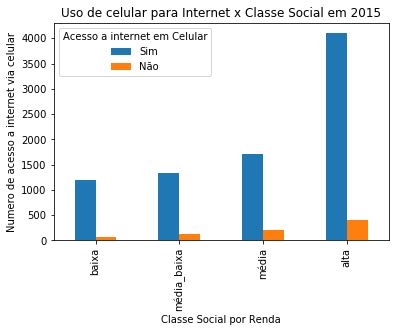

In [15]:
#Renda menor que 30000 dividida em 4 partes comparada com uso de internet via celular
cross_Class_Cel = pd.crosstab(dados15["Classe"], dados15["Acesso a internet em Celular"])
cross_Class_Cel.plot(kind='bar')
plt.xticks(np.arange(4),('baixa','média_baixa','média','alta'))
plt.xlabel("Classe Social por Renda")
plt.ylabel("Numero de acesso a internet via celular")
plt.title("Uso de celular para Internet x Classe Social em 2015")

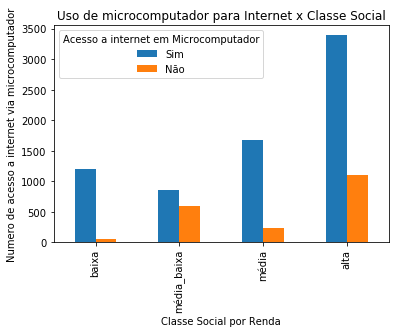

In [16]:
#Renda menor que 30000 dividida em 4 partes comparada com uso de internet via microcomputador
cross_Class_Cel = pd.crosstab(dados15["Classe"], dados15["Acesso a internet em Microcomputador"])
cross_Class_Cel.plot(kind='bar')
plt.xticks(np.arange(4),('baixa','média_baixa','média','alta'))
plt.ylabel("Numero de acesso a internet via microcomputador")
plt.xlabel("Classe Social por Renda")
plt.title("Uso de microcomputador para Internet x Classe Social")

In [ ]:
#dados15.to_csv('dados_2015_filtrado.csv')
#dados15_SP.to_csv('dados_2015_filtrado_SP.csv')

___
## Conclusão 

Descreva aqui suas conclusões!